In [4]:
import numpy as np
import pandas as pd
from google.colab import drive
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import tensorflow.nn as nn
import matplotlib.pyplot as plt

In [5]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [6]:
import sys
sys.path.insert(0,'/content/gdrive/MyDrive/C247_NNDL_Project/helper_functions')
from utils import augment_data, load_eeg_data
from models import eeg_CNN_LSTM_Model, eeg_CNN_FFT_Model, eeg_CNN_Model

# CNN

## CNN - train for each subject, test individually.

In [ ]:
# Hyperparams
EPOCHS = 300
batch_size = 256

Subject: 0
X_train_valid: (237, 1000, 22)
y_train_valid: (237,)
X_test: (50, 1000, 22)
y_test: (50,)
(756, 250, 1, 22)
(96, 250, 1, 22)
(100, 250, 1, 22)
Epoch 1/300
3/3 [==============================] - 2s 293ms/step - loss: 2.4180 - accuracy: 0.2976 - val_loss: 28.3197 - val_accuracy: 0.2500
Epoch 2/300
3/3 [==============================] - 1s 318ms/step - loss: 2.0995 - accuracy: 0.3757 - val_loss: 23.3406 - val_accuracy: 0.2500
Epoch 3/300
3/3 [==============================] - 1s 186ms/step - loss: 1.9136 - accuracy: 0.4074 - val_loss: 19.1354 - val_accuracy: 0.2708
Epoch 4/300
3/3 [==============================] - 1s 176ms/step - loss: 1.6858 - accuracy: 0.4325 - val_loss: 19.0754 - val_accuracy: 0.2500
Epoch 5/300
3/3 [==============================] - 1s 177ms/step - loss: 1.5309 - accuracy: 0.4563 - val_loss: 13.9180 - val_accuracy: 0.3125
Epoch 6/300
3/3 [==============================] - 1s 172ms/step - loss: 1.4372 - accuracy: 0.4683 - val_loss: 12.1167 - val_accuracy: 0

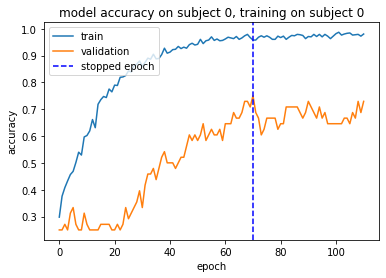

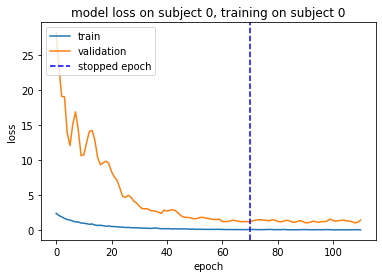

Subject: 1
X_train_valid: (236, 1000, 22)
y_train_valid: (236,)
X_test: (50, 1000, 22)
y_test: (50,)
(752, 250, 1, 22)
(96, 250, 1, 22)
(100, 250, 1, 22)
Epoch 1/300
3/3 [==============================] - 2s 260ms/step - loss: 2.4222 - accuracy: 0.2686 - val_loss: 15.0780 - val_accuracy: 0.3125
Epoch 2/300
3/3 [==============================] - 0s 171ms/step - loss: 2.0883 - accuracy: 0.3378 - val_loss: 14.9819 - val_accuracy: 0.3125
Epoch 3/300
3/3 [==============================] - 1s 208ms/step - loss: 1.9625 - accuracy: 0.3896 - val_loss: 13.5906 - val_accuracy: 0.3125
Epoch 4/300
3/3 [==============================] - 1s 300ms/step - loss: 1.6771 - accuracy: 0.4455 - val_loss: 6.1199 - val_accuracy: 0.3125
Epoch 5/300
3/3 [==============================] - 1s 313ms/step - loss: 1.5921 - accuracy: 0.4508 - val_loss: 9.2556 - val_accuracy: 0.3125
Epoch 6/300
3/3 [==============================] - 1s 166ms/step - loss: 1.4776 - accuracy: 0.4428 - val_loss: 13.0779 - val_accuracy: 0.3

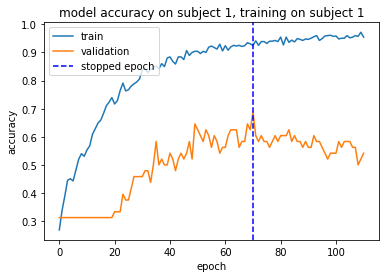

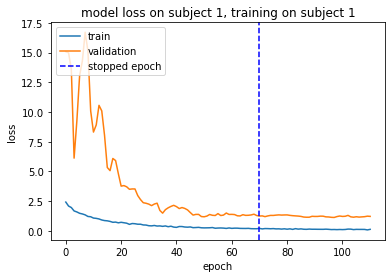

Subject: 2
X_train_valid: (236, 1000, 22)
y_train_valid: (236,)
X_test: (50, 1000, 22)
y_test: (50,)
(752, 250, 1, 22)
(96, 250, 1, 22)
(100, 250, 1, 22)
Epoch 1/300
3/3 [==============================] - 2s 237ms/step - loss: 2.4569 - accuracy: 0.2593 - val_loss: 14.3512 - val_accuracy: 0.2083
Epoch 2/300
3/3 [==============================] - 1s 167ms/step - loss: 2.1559 - accuracy: 0.3391 - val_loss: 14.9511 - val_accuracy: 0.2083
Epoch 3/300
3/3 [==============================] - 1s 173ms/step - loss: 1.9332 - accuracy: 0.4136 - val_loss: 11.1404 - val_accuracy: 0.2500
Epoch 4/300
3/3 [==============================] - 1s 296ms/step - loss: 1.7363 - accuracy: 0.4535 - val_loss: 9.2593 - val_accuracy: 0.3542
Epoch 5/300
3/3 [==============================] - 1s 286ms/step - loss: 1.5311 - accuracy: 0.4654 - val_loss: 9.7483 - val_accuracy: 0.3542
Epoch 6/300
3/3 [==============================] - 1s 171ms/step - loss: 1.5095 - accuracy: 0.4774 - val_loss: 12.2090 - val_accuracy: 0.2

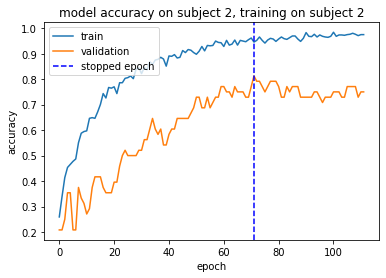

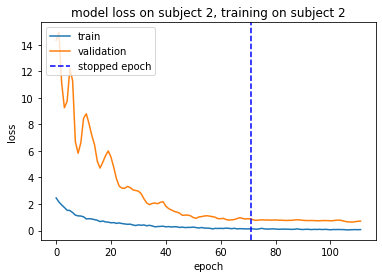

Subject: 3
X_train_valid: (234, 1000, 22)
y_train_valid: (234,)
X_test: (50, 1000, 22)
y_test: (50,)
(748, 250, 1, 22)
(94, 250, 1, 22)
(100, 250, 1, 22)
Epoch 1/300
3/3 [==============================] - 2s 241ms/step - loss: 2.5419 - accuracy: 0.2620 - val_loss: 9.6944 - val_accuracy: 0.2340
Epoch 2/300
3/3 [==============================] - 1s 191ms/step - loss: 2.1918 - accuracy: 0.3302 - val_loss: 13.5085 - val_accuracy: 0.2340
Epoch 3/300
3/3 [==============================] - 1s 178ms/step - loss: 1.8587 - accuracy: 0.4051 - val_loss: 8.0299 - val_accuracy: 0.3191
Epoch 4/300
3/3 [==============================] - 1s 189ms/step - loss: 1.6662 - accuracy: 0.4599 - val_loss: 4.7006 - val_accuracy: 0.3830
Epoch 5/300
3/3 [==============================] - 1s 274ms/step - loss: 1.6705 - accuracy: 0.4398 - val_loss: 5.5055 - val_accuracy: 0.2979
Epoch 6/300
3/3 [==============================] - 1s 308ms/step - loss: 1.4190 - accuracy: 0.4519 - val_loss: 7.6004 - val_accuracy: 0.1915

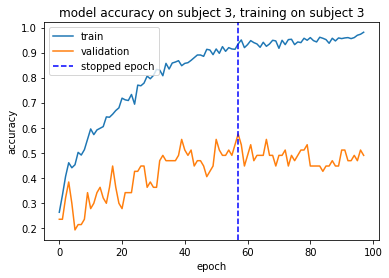

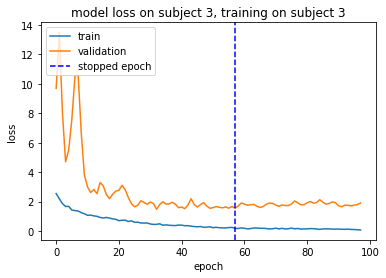

Subject: 4
X_train_valid: (235, 1000, 22)
y_train_valid: (235,)
X_test: (47, 1000, 22)
y_test: (47,)
(752, 250, 1, 22)
(94, 250, 1, 22)
(94, 250, 1, 22)
Epoch 1/300
3/3 [==============================] - 2s 317ms/step - loss: 2.3291 - accuracy: 0.2939 - val_loss: 10.2256 - val_accuracy: 0.2340
Epoch 2/300
3/3 [==============================] - 1s 308ms/step - loss: 1.9725 - accuracy: 0.4016 - val_loss: 10.7459 - val_accuracy: 0.2766
Epoch 3/300
3/3 [==============================] - 1s 306ms/step - loss: 1.7301 - accuracy: 0.4388 - val_loss: 8.0578 - val_accuracy: 0.3191
Epoch 4/300
3/3 [==============================] - 1s 169ms/step - loss: 1.4924 - accuracy: 0.4960 - val_loss: 7.0174 - val_accuracy: 0.2766
Epoch 5/300
3/3 [==============================] - 1s 194ms/step - loss: 1.2894 - accuracy: 0.5386 - val_loss: 4.6423 - val_accuracy: 0.3617
Epoch 6/300
3/3 [==============================] - 1s 171ms/step - loss: 1.1781 - accuracy: 0.5758 - val_loss: 4.5861 - val_accuracy: 0.4255

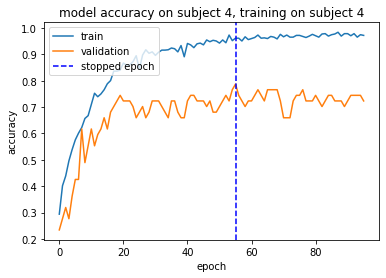

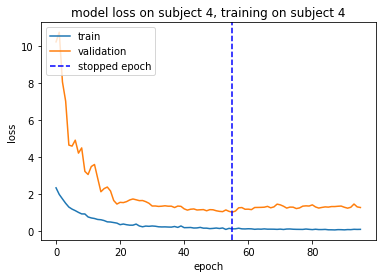

Subject: 5
X_train_valid: (236, 1000, 22)
y_train_valid: (236,)
X_test: (49, 1000, 22)
y_test: (49,)
(752, 250, 1, 22)
(96, 250, 1, 22)
(98, 250, 1, 22)
Epoch 1/300
3/3 [==============================] - 2s 386ms/step - loss: 2.4271 - accuracy: 0.3218 - val_loss: 16.2117 - val_accuracy: 0.2917
Epoch 2/300
3/3 [==============================] - 1s 312ms/step - loss: 2.0398 - accuracy: 0.3524 - val_loss: 23.7833 - val_accuracy: 0.2917
Epoch 3/300
3/3 [==============================] - 1s 172ms/step - loss: 1.8232 - accuracy: 0.4122 - val_loss: 19.5168 - val_accuracy: 0.2917
Epoch 4/300
3/3 [==============================] - 1s 182ms/step - loss: 1.5970 - accuracy: 0.4801 - val_loss: 15.1821 - val_accuracy: 0.3125
Epoch 5/300
3/3 [==============================] - 1s 174ms/step - loss: 1.4002 - accuracy: 0.4854 - val_loss: 14.5960 - val_accuracy: 0.3125
Epoch 6/300
3/3 [==============================] - 1s 176ms/step - loss: 1.3002 - accuracy: 0.5359 - val_loss: 16.2796 - val_accuracy: 0.

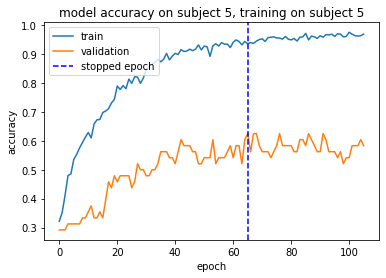

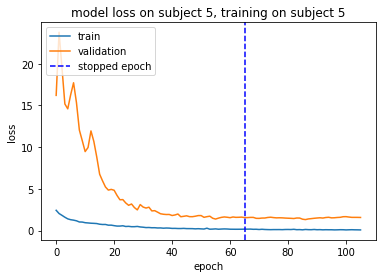

Subject: 6
X_train_valid: (238, 1000, 22)
y_train_valid: (238,)
X_test: (50, 1000, 22)
y_test: (50,)
(760, 250, 1, 22)
(96, 250, 1, 22)
(100, 250, 1, 22)
Epoch 1/300
3/3 [==============================] - 2s 244ms/step - loss: 2.2735 - accuracy: 0.3474 - val_loss: 11.9557 - val_accuracy: 0.3750
Epoch 2/300
3/3 [==============================] - 1s 181ms/step - loss: 1.8031 - accuracy: 0.4276 - val_loss: 15.8279 - val_accuracy: 0.3333
Epoch 3/300
3/3 [==============================] - 1s 171ms/step - loss: 1.5689 - accuracy: 0.4987 - val_loss: 12.3818 - val_accuracy: 0.3333
Epoch 4/300
3/3 [==============================] - 1s 182ms/step - loss: 1.3902 - accuracy: 0.5039 - val_loss: 7.9867 - val_accuracy: 0.3333
Epoch 5/300
3/3 [==============================] - 1s 201ms/step - loss: 1.2413 - accuracy: 0.5632 - val_loss: 10.6575 - val_accuracy: 0.3333
Epoch 6/300
3/3 [==============================] - 1s 308ms/step - loss: 1.2069 - accuracy: 0.5684 - val_loss: 9.7637 - val_accuracy: 0.3

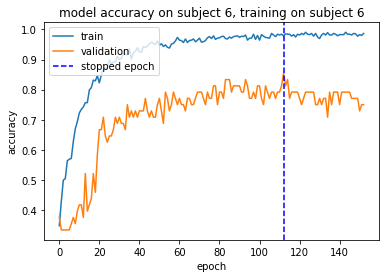

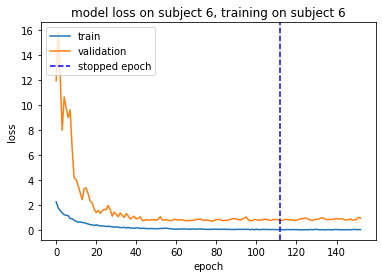

Subject: 7
X_train_valid: (232, 1000, 22)
y_train_valid: (232,)
X_test: (50, 1000, 22)
y_test: (50,)
(740, 250, 1, 22)
(94, 250, 1, 22)
(100, 250, 1, 22)
Epoch 1/300
3/3 [==============================] - 3s 410ms/step - loss: 2.2861 - accuracy: 0.3176 - val_loss: 7.7017 - val_accuracy: 0.3191
Epoch 2/300
3/3 [==============================] - 1s 308ms/step - loss: 2.0336 - accuracy: 0.3838 - val_loss: 3.2868 - val_accuracy: 0.4681
Epoch 3/300
3/3 [==============================] - 1s 264ms/step - loss: 1.5856 - accuracy: 0.4716 - val_loss: 4.8547 - val_accuracy: 0.4468
Epoch 4/300
3/3 [==============================] - 1s 184ms/step - loss: 1.5891 - accuracy: 0.4662 - val_loss: 3.8901 - val_accuracy: 0.4255
Epoch 5/300
3/3 [==============================] - 1s 171ms/step - loss: 1.4344 - accuracy: 0.5095 - val_loss: 6.2380 - val_accuracy: 0.3404
Epoch 6/300
3/3 [==============================] - 1s 177ms/step - loss: 1.2200 - accuracy: 0.5581 - val_loss: 6.5778 - val_accuracy: 0.3191


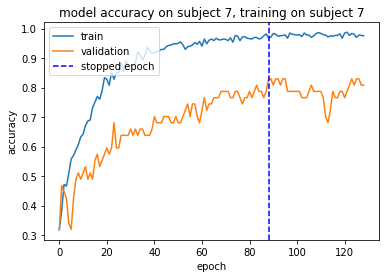

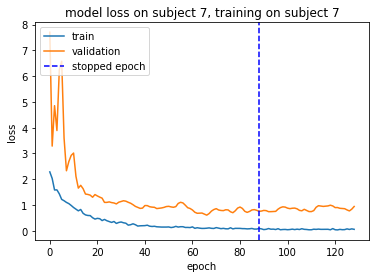

Subject: 8
X_train_valid: (231, 1000, 22)
y_train_valid: (231,)
X_test: (47, 1000, 22)
y_test: (47,)
(736, 250, 1, 22)
(94, 250, 1, 22)
(94, 250, 1, 22)
Epoch 1/300
3/3 [==============================] - 2s 239ms/step - loss: 2.0099 - accuracy: 0.3886 - val_loss: 45.8904 - val_accuracy: 0.2128
Epoch 2/300
3/3 [==============================] - 1s 170ms/step - loss: 1.5358 - accuracy: 0.5272 - val_loss: 46.1936 - val_accuracy: 0.2128
Epoch 3/300
3/3 [==============================] - 1s 210ms/step - loss: 1.4111 - accuracy: 0.5516 - val_loss: 40.4035 - val_accuracy: 0.2128
Epoch 4/300
3/3 [==============================] - 1s 302ms/step - loss: 1.2023 - accuracy: 0.5978 - val_loss: 34.5056 - val_accuracy: 0.2128
Epoch 5/300
3/3 [==============================] - 1s 306ms/step - loss: 1.0498 - accuracy: 0.6250 - val_loss: 30.8299 - val_accuracy: 0.2128
Epoch 6/300
3/3 [==============================] - 1s 174ms/step - loss: 0.9406 - accuracy: 0.6780 - val_loss: 29.7003 - val_accuracy: 0.

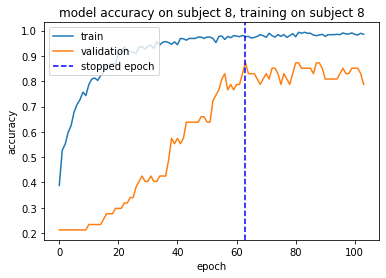

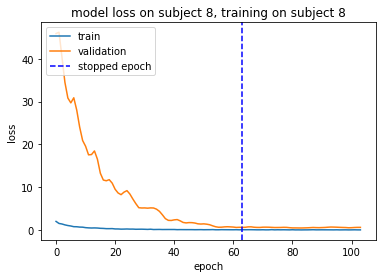

In [ ]:
# Train for each subject
test_accuracies = []
test_losses = []
valid_accuracies = []
valid_losses = []
train_accuracies = []
train_losses = []

for subject in range(9):
  print('Subject:', subject)

  # import data
  data = load_eeg_data(subject_index = subject, one_hot_ylabel=False)

  # train/valid split and preprocessing
  X_train, X_valid, y_train, y_valid = train_test_split(data['X_train_valid'], data['y_train_valid'], test_size=0.2)
  
  X_train, y_train = augment_data(X_train, y_train, noise_var = 0.5) 
  X_valid, y_valid = augment_data(X_valid, y_valid, noise=False, filter=False, max_pool=False, avg_pool=False)
  X_test, y_test = augment_data(data['X_test'], data['y_test'], noise=False, filter=False, max_pool=False, avg_pool=False) 
  
  X_train = np.expand_dims(X_train, axis = -2)
  X_valid = np.expand_dims(X_valid, axis = -2)
  X_test = np.expand_dims(X_test, axis = -2)
  
  print(X_train.shape)
  print(X_valid.shape)
  print(X_test.shape)

  train = tf.data.Dataset.from_tensor_slices((X_train, y_train))
  valid = tf.data.Dataset.from_tensor_slices((X_valid, y_valid))
  test = tf.data.Dataset.from_tensor_slices((X_test, y_test))

  # batch and shuffle
  train = train.shuffle(1024).batch(batch_size)
  valid = valid.shuffle(1024).batch(batch_size)
  test = test.shuffle(1024).batch(batch_size)

  # define early stopping
  cb = tf.keras.callbacks.EarlyStopping(
      monitor="val_accuracy",
      min_delta=0,
      patience=40,
      verbose=1,
      mode="auto",
      baseline=None,
      restore_best_weights=True,
      start_from_epoch=0,
  )

  # define learning schedule
  lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
      initial_learning_rate=0.005,
      decay_steps=20,
      decay_rate=0.98,
      staircase=True)

  # define loss function
  loss_fn = keras.losses.SparseCategoricalCrossentropy()

  # define optimizer
  opt = keras.optimizers.Adam(learning_rate=lr_schedule)

  # build model
  input_shape = X_train.shape[1:]
  model = eeg_CNN_Model(input_shape)

  # compile model
  model.compile(optimizer=opt, loss=loss_fn, metrics='accuracy')

  # fit model
  history = model.fit(x=train, validation_data=valid, epochs=EPOCHS, callbacks=cb)

  # test model
  print("----- TEST -----")
  eval = model.evaluate(test)
  test_loss, test_acc = eval[0], eval[1]
  stop_epoch = cb.stopped_epoch - 40
  valid_loss = history.history['val_loss'][stop_epoch-1]
  print(valid_loss)


  test_losses.append(test_loss)
  test_accuracies.append(test_acc)
  valid_losses.append(valid_loss)
  #valid_accuracies.append(valid_acc)
  #train_losses.append(train_loss)
  #train_accuracies.append(train_acc)
  

  # plotting
  plt.figure()
  # plot history (accuracy)
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.axvline(x = stop_epoch, color = 'b', linestyle='--')
  plt.title('model accuracy on subject {}, training on subject {}'.format(subject, subject))
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'validation', 'stopped epoch'], loc='upper left')
  plt.show()

  plt.figure()
  # plot history (loss)
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.axvline(x = stop_epoch, color = 'b', linestyle='--')
  plt.title('model loss on subject {}, training on subject {}'.format(subject, subject))
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'validation', 'stopped epoch'], loc='upper left')
  plt.show()

In [ ]:
history.history['accuracy']

In [ ]:
for i, acc in enumerate(test_accuracies):
  print('Accuracy for subject {} is {}'.format(i, acc))

for i, loss in enumerate(test_losses):
  print('Loss for subject {} is {}'.format(i, loss))

Accuracy for subject 0 is 0.5799999833106995
Accuracy for subject 1 is 0.5400000214576721
Accuracy for subject 2 is 0.5600000023841858
Accuracy for subject 3 is 0.6000000238418579
Accuracy for subject 4 is 0.7234042286872864
Accuracy for subject 5 is 0.36734694242477417
Accuracy for subject 6 is 0.699999988079071
Accuracy for subject 7 is 0.5400000214576721
Accuracy for subject 8 is 0.7446808218955994
Loss for subject 0 is 1.8015955686569214
Loss for subject 1 is 2.6968231201171875
Loss for subject 2 is 1.6028105020523071
Loss for subject 3 is 1.288651704788208
Loss for subject 4 is 1.615634799003601
Loss for subject 5 is 3.4355649948120117
Loss for subject 6 is 1.4370777606964111
Loss for subject 7 is 1.8397772312164307
Loss for subject 8 is 0.7884553670883179


## Train on all - test on each individul and also all

In [23]:
# Hyperparams
EPOCHS = 300
batch_size = 512

In [24]:
# Train on data consisting of all subjects
# import data
data = load_eeg_data(subject_index = None, one_hot_ylabel=False)

# train/valid split and preprocessing
X_train, X_valid, y_train, y_valid = train_test_split(data['X_train_valid'], data['y_train_valid'], test_size=0.2)

X_train, y_train = augment_data(X_train, y_train, noise_var = 0.5) 
X_valid, y_valid = augment_data(X_valid, y_valid, noise=False, filter=False, max_pool=False, avg_pool=False)
X_test, y_test = augment_data(data['X_test'], data['y_test'], noise=False, filter=False, max_pool=False, avg_pool=False) 

X_train = np.expand_dims(X_train, axis = -2)
X_valid = np.expand_dims(X_valid, axis = -2)
X_test = np.expand_dims(X_test, axis = -2)
print(X_train.shape)
print(X_valid.shape)
print(X_test.shape)

train = tf.data.Dataset.from_tensor_slices((X_train, y_train))
valid = tf.data.Dataset.from_tensor_slices((X_valid, y_valid))
test = tf.data.Dataset.from_tensor_slices((X_test, y_test))

# batch and shuffle
train = train.shuffle(1024).batch(batch_size)
valid = valid.shuffle(1024).batch(batch_size)
test = test.shuffle(1024).batch(batch_size)

# define early stopping
cb = tf.keras.callbacks.EarlyStopping(
    monitor="val_accuracy",
    min_delta=0,
    patience=40,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=True,
    start_from_epoch=0,
)

# define learning schedule
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.005,
    decay_steps=20,
    decay_rate=0.98,
    staircase=True)

# define loss function
loss_fn = keras.losses.SparseCategoricalCrossentropy()

# define optimizer
opt = keras.optimizers.Adam(learning_rate=lr_schedule)

# build model
input_shape = X_train.shape[1:]
model = eeg_CNN_Model(input_shape)

# compile model
model.compile(optimizer=opt, loss=loss_fn, metrics='accuracy')

# fit model
history = model.fit(x=train, validation_data=valid, epochs=EPOCHS, callbacks=cb)

X_train_valid: (2115, 1000, 22)
y_train_valid: (2115,)
X_test: (443, 1000, 22)
y_test: (443,)
(5076, 250, 1, 22)
(423, 250, 1, 22)
(443, 250, 1, 22)
Epoch 1/300
10/10 [==============================] - 10s 879ms/step - loss: 2.2577 - accuracy: 0.2983 - val_loss: 9.0637 - val_accuracy: 0.2648
Epoch 2/300
10/10 [==============================] - 6s 623ms/step - loss: 1.7436 - accuracy: 0.3239 - val_loss: 7.7267 - val_accuracy: 0.2695
Epoch 3/300
10/10 [==============================] - 7s 687ms/step - loss: 1.5403 - accuracy: 0.3454 - val_loss: 9.4062 - val_accuracy: 0.2648
Epoch 4/300
10/10 [==============================] - 7s 699ms/step - loss: 1.4324 - accuracy: 0.3528 - val_loss: 3.9855 - val_accuracy: 0.3002
Epoch 5/300
10/10 [==============================] - 5s 517ms/step - loss: 1.3843 - accuracy: 0.3761 - val_loss: 2.5787 - val_accuracy: 0.3262
Epoch 6/300
10/10 [==============================] - 8s 770ms/step - loss: 1.3289 - accuracy: 0.3914 - val_loss: 1.6948 - val_accuracy:

----- TESTING ON ALL SUBJECTS -----
1/1 [==============================] - 0s 304ms/step - loss: 0.7192 - accuracy: 0.7359
loss: 0.7191749215126038
acc: 0.7358916401863098


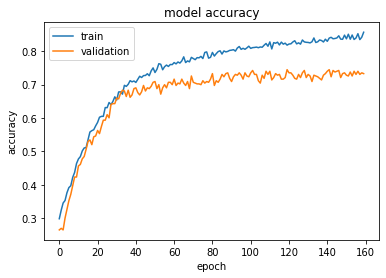

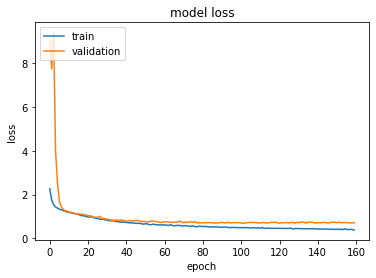

In [25]:
# Test model on all-subject dataset
# test model
print("----- TESTING ON ALL SUBJECTS -----")
eval = model.evaluate(test)
loss, acc = eval[0], eval[1]
print('loss:', loss)
print('acc:', acc)

# plotting
plt.figure()
# plot history (accuracy)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# plot history (loss)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [26]:
# Test model on each individual subject
for subject in range(9):
  print("----- TESTING ON SUBJECT {} -----".format(subject))

  # import data
  data = load_eeg_data(subject_index = subject, one_hot_ylabel=False)

  # preprocessing
  X_test, y_test = augment_data(data['X_test'], data['y_test'], noise=False, filter=False, max_pool=False, avg_pool=False) 
  X_test = np.expand_dims(X_test, axis = -2)
  print(X_test.shape)
  test = tf.data.Dataset.from_tensor_slices((X_test, y_test))
  test = test.shuffle(1024).batch(batch_size)

  results_test = model.evaluate(test)

  print('Testing Loss: {}'.format(results_test[0]))
  print('Testing Accuracy: {}'.format(results_test[1])) 
  print('\n')

----- TESTING ON SUBJECT 0 -----
X_train_valid: (237, 1000, 22)
y_train_valid: (237,)
X_test: (50, 1000, 22)
y_test: (50,)
(50, 250, 1, 22)
1/1 [==============================] - 0s 37ms/step - loss: 0.8256 - accuracy: 0.6600
Testing Loss: 0.8256039619445801
Testing Accuracy: 0.6600000262260437


----- TESTING ON SUBJECT 1 -----
X_train_valid: (236, 1000, 22)
y_train_valid: (236,)
X_test: (50, 1000, 22)
y_test: (50,)
(50, 250, 1, 22)
1/1 [==============================] - 0s 31ms/step - loss: 0.8927 - accuracy: 0.6200
Testing Loss: 0.8927168846130371
Testing Accuracy: 0.6200000047683716


----- TESTING ON SUBJECT 2 -----
X_train_valid: (236, 1000, 22)
y_train_valid: (236,)
X_test: (50, 1000, 22)
y_test: (50,)
(50, 250, 1, 22)
1/1 [==============================] - 0s 39ms/step - loss: 0.5610 - accuracy: 0.7600
Testing Loss: 0.5610054731369019
Testing Accuracy: 0.7599999904632568


----- TESTING ON SUBJECT 3 -----
X_train_valid: (234, 1000, 22)
y_train_valid: (234,)
X_test: (50, 1000, 2